In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
train = pd.read_csv("DATA/train.csv")
test = pd.read_csv("DATA/test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [58]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [59]:
len(test), len(train)

(1459, 1460)

In [68]:
df = pd.concat([train, test], axis=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [69]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [71]:
df.duplicated().sum()

0

In [74]:
null = df.isna().sum().sort_values(ascending=False).head(35)
null

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
BsmtFinSF1         1
BsmtFinSF2         1
SaleType           1
Electrical         1
GarageCars         1
TotalBsmtSF        1
GarageArea         1
Exterior2nd        1
Exterior1st        1
KitchenQual        1
BsmtUnfSF          1
dtype: int64

In [75]:
null_per = (null / len(df)) * 100 
null_per

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
Utilities        0.068517
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
SaleType         0.034258
Electrical       0.034258
GarageCars       0.034258
TotalBsmtSF      0.034258
GarageArea       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
KitchenQual      0.034258
BsmtUnfSF        0.034258
dtype: float64

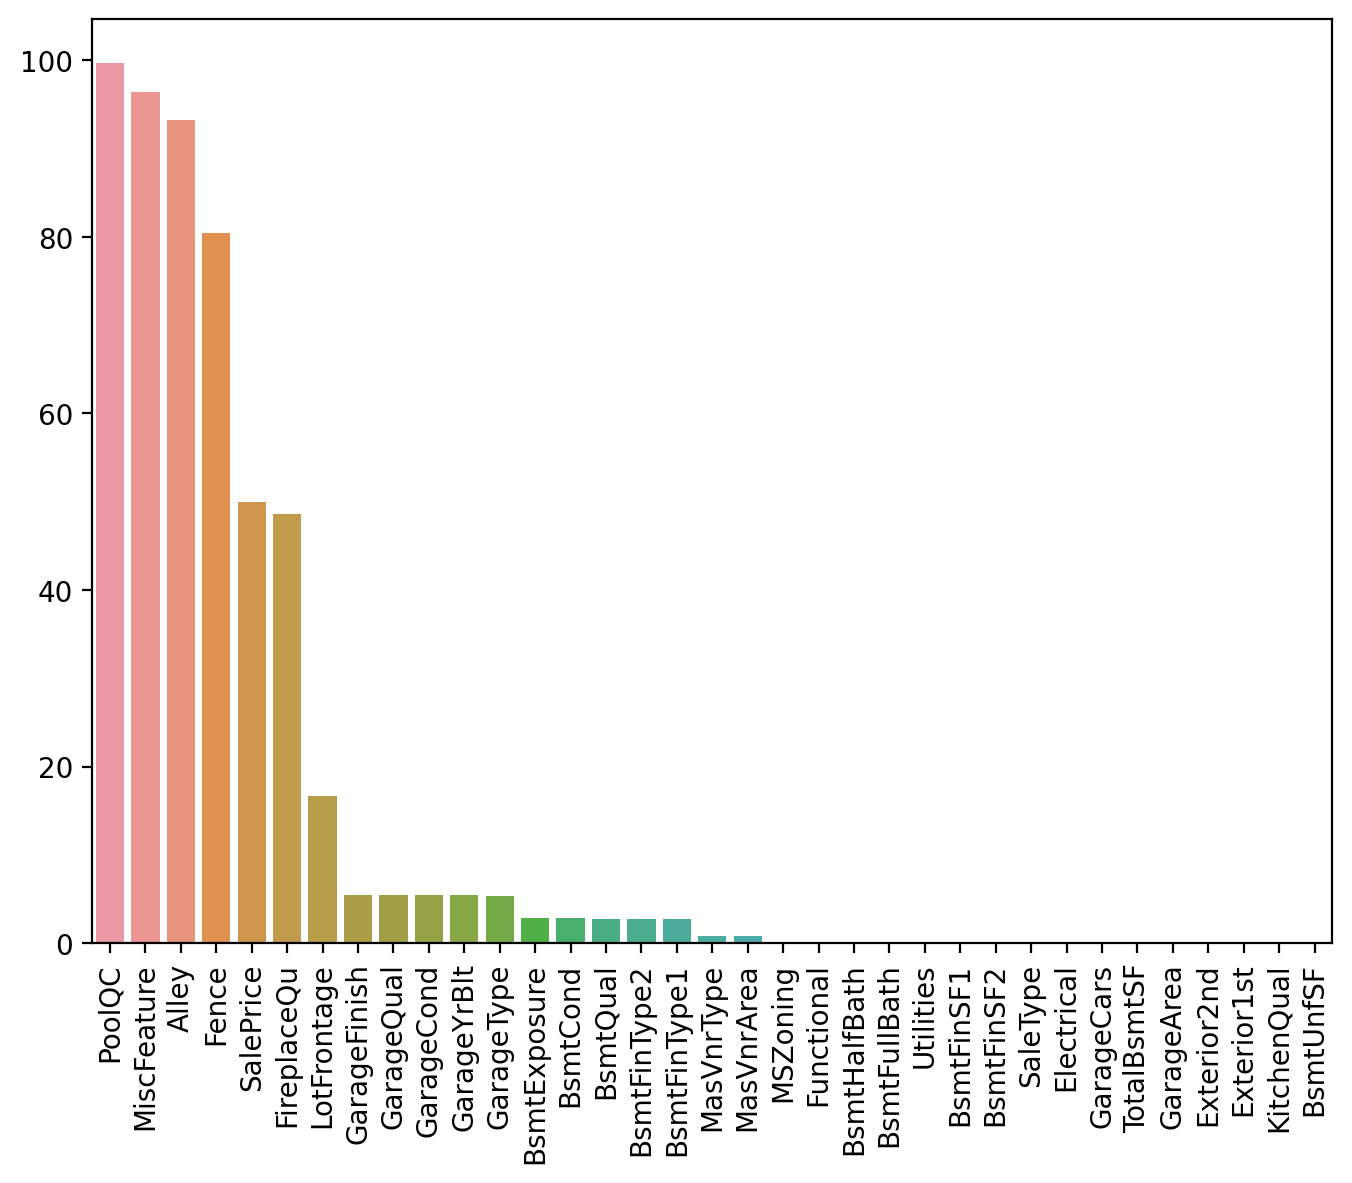

In [76]:
plt.figure(figsize=(8,6), dpi=200)
sns.barplot(x=null_per.index, y=null_per.values)
plt.xticks(rotation=90);

In [88]:
df.loc[(df['MiscFeature'].notna()) & (df['Alley'].notna()) & df['PoolQC'].notna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
106,107,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,7,1885,1995,Mansard,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,641.0,641.0,GasA,Gd,Y,SBrkr,1047,0,0,1047,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1954.0,Unf,1.0,273.0,Fa,Fa,N,0,0,0,0,0,0,NaN,Shed,450,8,2007,WD,Normal,100000.0
439,440,50,RL,67.0,12354,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,8,1920,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Unf,0.0,Unf,0.0,684.0,684.0,GasA,Gd,Y,SBrkr,684,512,0,1196,0.0,0.0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,2005.0,Unf,2.0,528.0,TA,TA,Y,0,46,0,0,0,0,GdPrv,Shed,800,8,2009,ConLI,Normal,110000.0
1076,1077,50,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,8,1936,1989,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,ALQ,626.0,Unf,0.0,170.0,796.0,GasA,Gd,Y,SBrkr,1096,370,0,1466,0.0,1.0,2,0,3,1,Gd,7,Min1,1,TA,Attchd,1950.0,Unf,2.0,566.0,TA,TA,Y,436,21,0,0,0,0,NaN,Shed,500,4,2006,WD,Normal,170000.0
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493.0,Unf,0.0,1017.0,1510.0,GasW,Ex,Y,SBrkr,1584,1208,0,2792,0.0,0.0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920.0,Unf,2.0,520.0,Fa,TA,Y,0,547,0,0,480,0,MnPrv,Shed,1150,6,2008,WD,Normal,256000.0
133,1594,90,RH,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,Shed,500,2,2010,WD,Normal,NaN
370,1831,70,RM,68.0,9928,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,8,1915,1994,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,672.0,672.0,GasA,Fa,Y,SBrkr,1272,672,0,1944,0.0,0.0,2,0,3,1,TA,8,Min2,0,NaN,Detchd,1915.0,Unf,1.0,216.0,TA,TA,N,24,28,0,0,0,0,NaN,Shed,400,6,2009,WD,Normal,NaN
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,MnPrv,Shed,1000,9,2008,WD,Normal,NaN
1330,2791,20,RM,65.0,9750,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1958,1958,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,960.0,960.0,GasA,Ex,Y,SBrkr,960,0,0,960,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,2002.0,Unf,2.0,624.0,TA,TA,Y,0,0,0,0,0,0,NaN,Gar2,4500,7,2006,WD,Normal,NaN


In [103]:
df = df.drop(['MiscFeature', 'Alley', 'PoolQC'], axis=1)

In [91]:
df[df['Fence'].notna()].head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733.0,Unf,0.0,520.0,1253.0,GasA,TA,Y,SBrkr,1253,0,0,1253,1.0,0.0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1.0,352.0,TA,TA,Y,0,213,176,0,0,0,GdWo,NaN,0,5,2008,WD,Normal,157000.0
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,832.0,832.0,GasA,Ex,Y,FuseA,854,0,0,854,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2.0,576.0,TA,TA,Y,48,112,0,0,0,0,GdPrv,NaN,0,7,2007,WD,Normal,132000.0
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1965,Hip,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,504.0,Unf,0.0,525.0,1029.0,GasA,TA,Y,SBrkr,1339,0,0,1339,0.0,0.0,1,0,3,1,TA,6,Min1,0,NaN,Attchd,1958.0,Unf,1.0,294.0,TA,TA,Y,0,0,0,0,0,0,MnPrv,NaN,0,5,2009,COD,Abnorml,139000.0
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,7,7,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,637.0,637.0,GasA,Ex,Y,FuseF,1108,0,0,1108,0.0,0.0,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1930.0,Unf,1.0,280.0,TA,TA,N,0,0,205,0,0,0,GdPrv,NaN,0,6,2007,WD,Normal,139400.0
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188.0,ALQ,668.0,204.0,1060.0,GasA,Ex,Y,SBrkr,1060,0,0,1060,1.0,0.0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1.0,270.0,TA,TA,Y,406,90,0,0,0,0,MnPrv,NaN,0,5,2010,WD,Normal,154000.0
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,649.0,649.0,GasA,TA,N,SBrkr,649,668,0,1317,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1.0,250.0,TA,Fa,N,0,54,172,0,0,0,MnPrv,NaN,0,7,2008,WD,Normal,40000.0
31,32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1228.0,1228.0,GasA,Gd,Y,SBrkr,1228,0,0,1228,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1966.0,Unf,1.0,271.0,TA,TA,Y,0,65,0,0,0,0,MnPrv,NaN,0,6,2008,WD,Normal,149350.0
40,41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1965,1965,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,101.0,TA,TA,CBlock,TA,TA,No,Rec,643.0,Unf,0.0,445.0,1088.0,GasA,Ex,Y,SBrkr,1324,0,0,1324,0.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1965.0,RFn,2.0,440.0,TA,TA,Y,0,138,0,0,0,0,GdWo,NaN,0,12,2006,WD,Abnorml,160000.0
42,43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1

In [92]:
df = df.drop('Fence', axis=1)

In [96]:
df[df['FireplaceQu'].notna()].head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851.0,Unf,0.0,140.0,991.0,GasA,Ex,Y,SBrkr,1077,0,0,1077,1.0,0.0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1.0,205.0,Gd,TA,Y,0,4,0,0,0,0,NaN,0,1,2008,WD,Normal,118000.0
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998.0,Unf,0.0,177.0,1175.0,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1.0,0.0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3.0,736.0,TA,TA,Y,147,21,0,0,0,0,NaN,0,7,2006,New,Partial,345000.0
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,Com

In [98]:
df['FireplaceQu'].fillna('Missing', inplace=True)

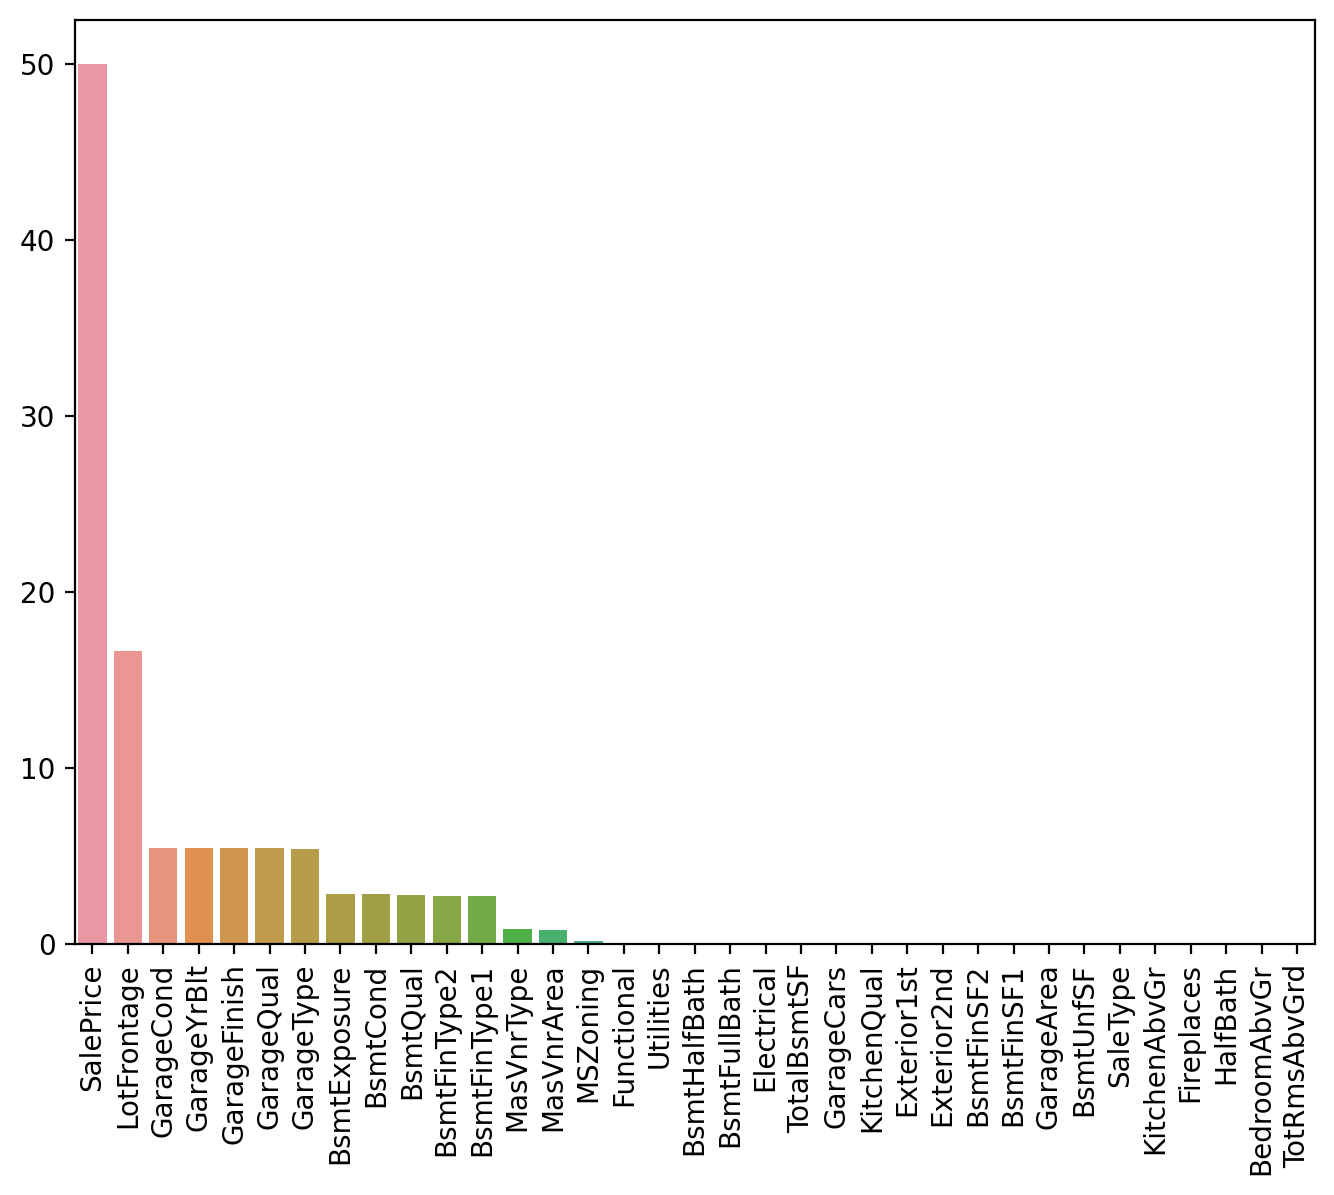

In [111]:
null = df.isna().sum().sort_values(ascending=False).head(35)
null_per = (null / len(df)) * 100 

plt.figure(figsize=(8,6), dpi=200)
sns.barplot(x=null_per.index, y=null_per.values)
plt.xticks(rotation=90);

In [112]:
df = df.drop(['MSZoning', 'Functional', 'BsmtHalfBath', 'BsmtFullBath', 'Utilities', 'BsmtFinSF1', 'BsmtFinSF2', 'SaleType', 'Electrical', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'BsmtUnfSF'], axis=1)

In [115]:
mean = df['LotFrontage'].mean()
df['LotFrontage'].fillna(mean, inplace=True)

In [119]:
df.isna().sum().sort_values(ascending=False).head(13)

SalePrice       1459
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
dtype: int64

In [125]:
df['GarageCond'].fillna('Missing', inplace=True)

In [127]:
df.isna().sum().sort_values(ascending=False).head(13)

SalePrice       1459
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MoSold             0
MiscVal            0
dtype: int64

In [126]:
df['GarageQual'].fillna('Missing', inplace=True)

In [130]:
df['GarageFinish'].fillna('Missing', inplace=True)
df['GarageType'].fillna('Missing', inplace=True)
df['GarageYrBlt'].fillna('Missing', inplace=True)

In [134]:
df[df['BsmtExposure'].isna()].head(15)

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
17,18,90,72.000000,10791,Pave,Reg,Lvl,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,1296,0,0,1296,2,0,2,2,6,0,Missing,CarPort,1967.0,Unf,TA,TA,Y,0,0,0,0,0,0,500,10,2006,Normal,90000.0
39,40,90,65.000000,6040,Pave,Reg,Lvl,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,GasA,TA,N,1152,0,0,1152,2,0,2,2,6,0,Missing,Missing,Missing,Missing,Missing,Missing,N,0,0,0,0,0,0,0,6,2008,AdjLand,82000.0
90,91,20,60.000000,7200,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,1040,0,0,1040,1,0,2,1,4,0,Missing,Detchd,1950.0,Unf,TA,TA,Y,0,29,0,0,0,0,0,7,2006,Normal,109900.0
102,103,90,64.000000,7018,Pave,Reg,Bnk,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,1535,0,0,1535,2,0,4,2,8,0,Missing,Attchd,1979.0,Unf,TA,TA,Y,0,0,0,0,0,0,0,6,2009,Alloca,118964.0
156,157,20,60.000000,7200,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,1040,0,0,1040,1,0,2,1,5,0,Missing,Detchd,1950.0,Unf,TA,TA,Y,0,0,0,0,0,0,0,6,2006,Normal,109500.0
182,183,20,60.000000,9060,Pave,Reg,Lvl,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,GasA,Ex,Y,1340,0,0,1340,1,0,3,1,7,1,Gd,Attchd,1957.0,RFn,TA,TA,Y,116,0,0,180,0,0,0,6,2007,Normal,120000.0
259,260,20,70.000000,12702,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,GasA,Gd,Y,882,0,0,882,1,0,2,1,4,0,Missing,Detchd,1956.0,Unf,TA,TA,Y,0,45,0,0,0,0,0,12,2008,Normal,97000.0
342,343,90,69.305795,8544,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,Wall,Fa,N,1040,0,0,1040,2,0,2,2,6,0,Missing,Detchd,1949.0,Unf,TA,TA,Y,0,0,0,0,0,0,0,5,2006,Normal,87500.0
362,363,85,64.000000,7301,Pave,Reg,Lvl,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,Ex,Y,495,1427,0,1922,3,0,4,1,7,1,Ex,BuiltIn,2003.0,RFn,TA,TA,Y,0,0,177,0,0,0,0,7,2009,Normal,198500.0
371,372,50,80.000000,17120,Pave,Reg,Lvl,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,1120,468,0,1588,2,0,4,1,7,1,Gd,Detchd,1991.0,Fin,TA,TA,N,0,59,0,0,0,0,0,7,2008,Normal,134432.0


In [138]:
df['BsmtExposure'].fillna('Missing', inplace=True)
df['BsmtCond'].fillna('Missing', inplace=True)
df['BsmtQual'].fillna('Missing', inplace=True)
df['BsmtFinType2'].fillna('Missing', inplace=True)
df['BsmtFinType1'].fillna('Missing', inplace=True)

df[df['MasVnrArea'].isna()]

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
234,235,60,69.305795,7851,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,860,1100,0,1960,2,1,4,1,8,2,TA,BuiltIn,2002.0,Fin,TA,TA,Y,288,48,0,0,0,0,0,5,2010,Normal,216500.0
529,530,20,69.305795,32668,Pave,IR1,Lvl,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,Unf,GasA,TA,Y,2515,0,0,2515,3,0,4,2,9,2,TA,Attchd,1975.0,RFn,TA,TA,Y,0,0,200,0,0,0,0,3,2007,Alloca,200624.0
650,651,60,65.000000,8125,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,822,843,0,1665,2,1,3,1,7,0,Missing,Attchd,2007.0,RFn,TA,TA,Y,0,0,0,0,0,0,0,5,2008,Normal,205950.0
936,937,20,67.000000,10083,Pave,Reg,Lvl,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,1200,0,0,1200,2,0,2,1,5,0,Missing,Attchd,2003.0,RFn,TA,TA,Y,0,41,0,0,0,0,0,8,2009,Normal,184900.0
973,974,20,95.000000,11639,Pave,Reg,Lvl,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,1428,0,0,1428,2,0,3,1,6,0,Missing,Attchd,2007.0,Fin,TA,TA,Y,0,120,0,0,0,0,0,12,2008,Partial,182000.0
977,978,120,35.000000,4274,Pave,IR1,Lvl,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,1241,0,0,1241,1,1,1,1,4,0,Missing,Attchd,2007.0,Fin,TA,TA,Y,0,116,0,0,0,0,0,11,2007,Partial,199900.0
1243,1244,20,107.000000,13891,Pave,Reg,Lvl,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,Unf,GasA,Ex,Y,2076,0,0,2076,2,1,2,1,7,1,Gd,Attchd,2006.0,Fin,TA,TA,Y,216,229,0,0,0,0,0,9,2006,Partial,465000.0
1278,1279,60,75.000000,9473,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,1128,903,0,2031,2,1,3,1,7,1,Gd,Attchd,2002.0,RFn,TA,TA,Y,0,211,0,0,0,0,0,3,2008,Normal,237000.0
231,1692,60,69.305795,12891,Pave,IR1,Lvl,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,Unf,GasA,Ex,Y,878,1126,0,2004,2,1,4,1,8,1,Gd,BuiltIn,2002.0,Fin,TA,TA,Y,0,48,0,0,0,0,0,7,2009,Normal,NaN
246,1707,20,90.000000,7993,Pave,IR1,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,Unf,GasA,Ex,Y,1436,0,0,1436,2,0,3,1,6,0,Missing,Attchd,2008.0,Fin,TA,TA,Y,0,121,0,0,0,0,0,10,2009,Partial,NaN


In [139]:
df['MasVnrType'].fillna('Missing', inplace=True)
df['MasVnrArea'].fillna('Missing', inplace=True)

In [140]:
df.isna().sum()

Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
Heating             0
HeatingQC           0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
FireplaceQu         0
GarageType          0
GarageYrBl

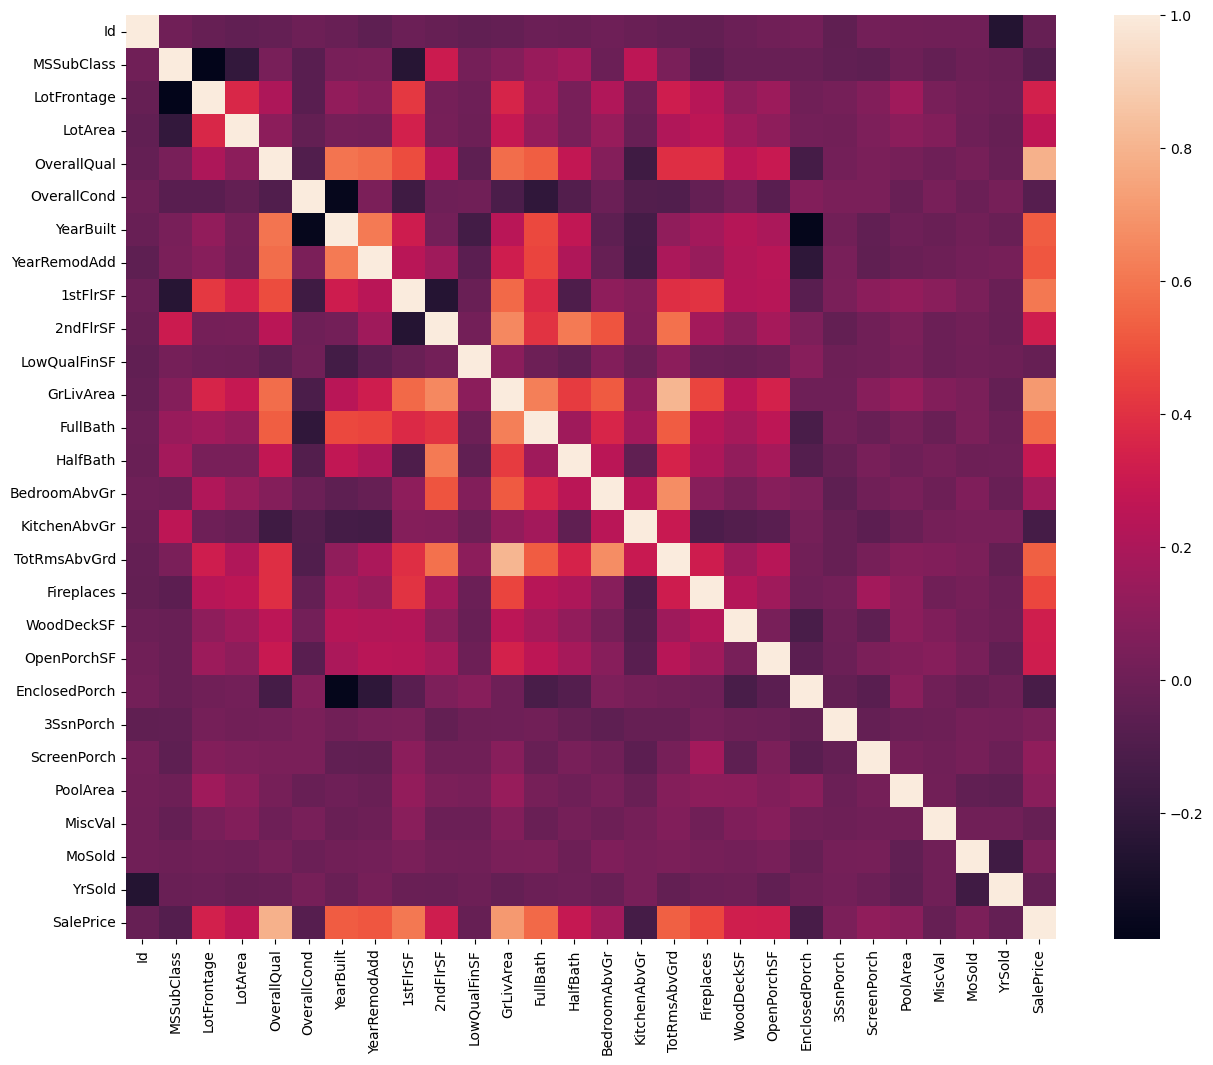

In [151]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(numeric_only=True));

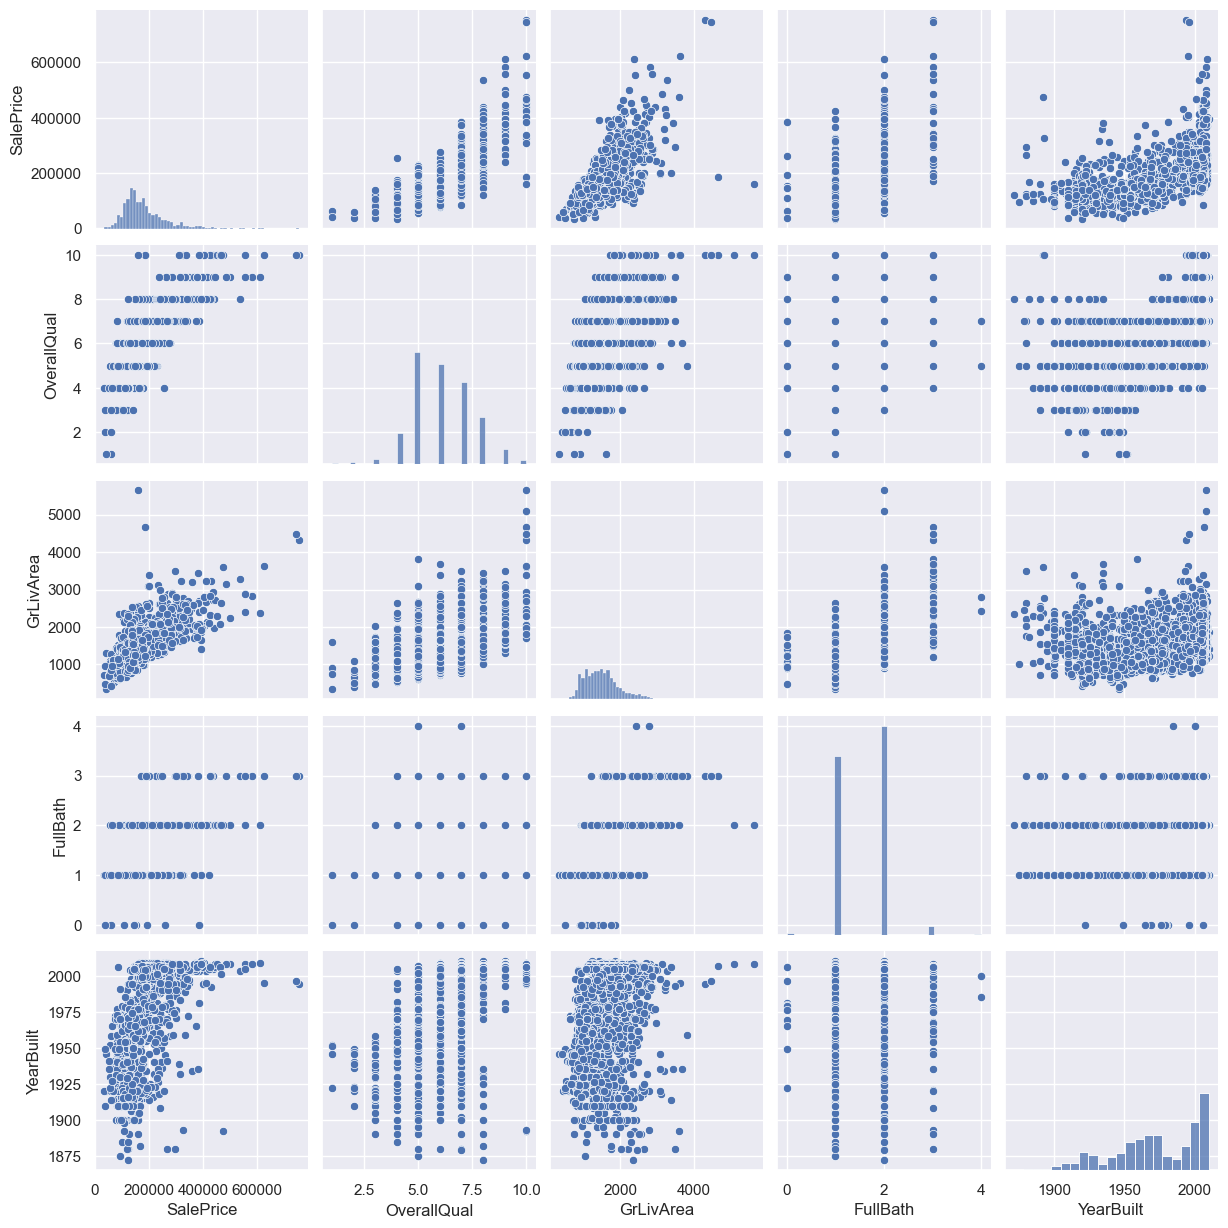

In [153]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols])
plt.show();